<a href="https://colab.research.google.com/github/akumadevs/analise-imdb-top250/blob/main/analisefilmes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Bibliotecas carregadas!


Saving imdb_top_movies.csv to imdb_top_movies (3).csv
Dataset carregado!
Informações gerais:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Rank       250 non-null    int64  
 1   Title      250 non-null    object 
 2   Year       250 non-null    int64  
 3   Rating     250 non-null    float64
 4   Duration   250 non-null    object 
 5   IMDb URL   250 non-null    object 
 6   Image URL  250 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 13.8+ KB

Estatísticas básicas:

Valores ausentes por coluna:
Rank         0
Title        0
Year         0
Rating       0
Duration     0
IMDb URL     0
Image URL    0
dtype: int64

Colunas disponíveis:
Index(['Rank', 'Title', 'Year', 'Rating', 'Duration', 'IMDb URL', 'Image URL'], dtype='object')
Limpeza concluída!
Top 10 filmes por nota IMDb:


,Rank,Title,Year,Rating
0,1,The Shawshank Redemption,1994,9.3
1,2,The Godfather,1972,9.2
2,3,The Dark Knight,2008,9.1
3,4,The Godfather Part II,1974,9.0
4,5,12 Angry Men,1957,9.0
5,6,The Lord of the Rings: The Return of the King,2003,9.0
6,7,Schindler's List,1993,9.0
7,8,The Lord of the Rings: The Fellowship of the Ring,2001,8.9
8,9,Pulp Fiction,1994,8.8
9,10,"The Good, the Bad and the Ugly",1966,8.8


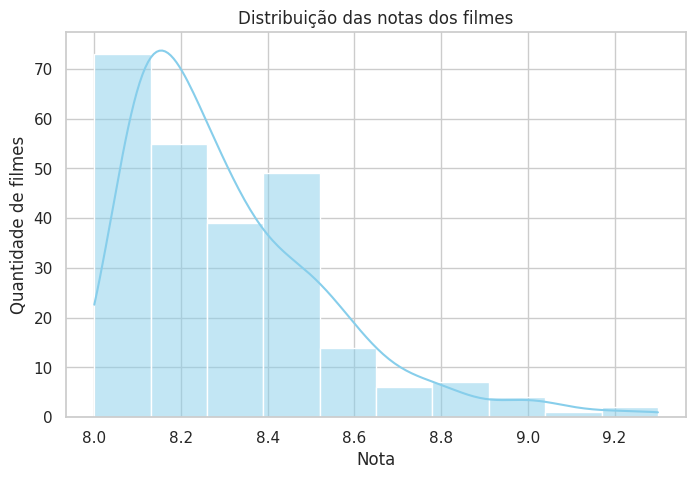

/tmp/ipython-input-3218157506.py:97: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Decade', data=df, palette='viridis')


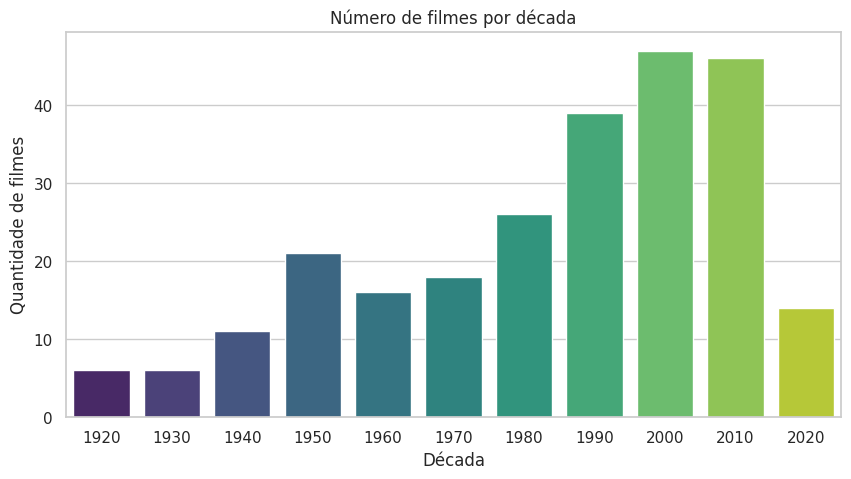

/tmp/ipython-input-3218157506.py:107: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df.groupby('Decade')['Duration_min'].mean().index,


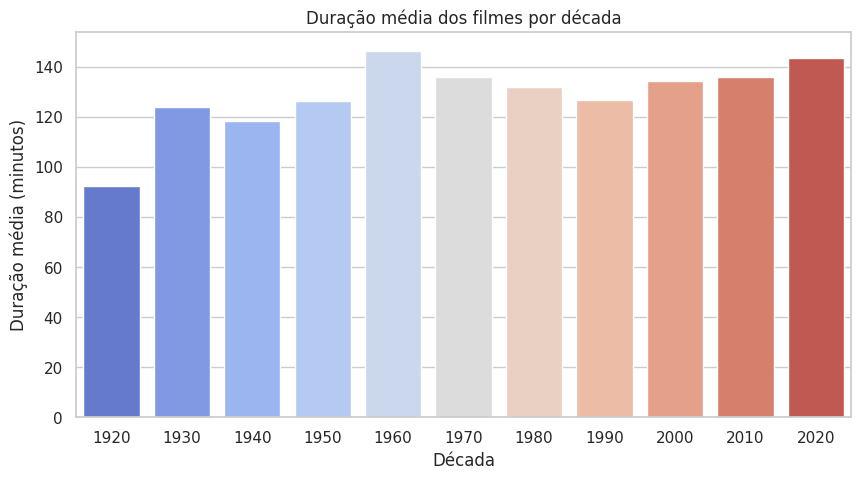

Top 10 filmes mais longos:


,Title,Year,Duration_min
159,The Best of Youth,2003,374
247,Gangs of Wasseypur,2012,321
164,Gone with the Wind,1939,238
87,Once Upon a Time in America,1984,229
98,Lawrence of Arabia,1962,227
183,Ben-Hur,1959,212
22,Seven Samurai,1954,207
3,The Godfather Part II,1974,202
5,The Lord of the Rings: The Return of the King,2003,201
6,Schindler's List,1993,195


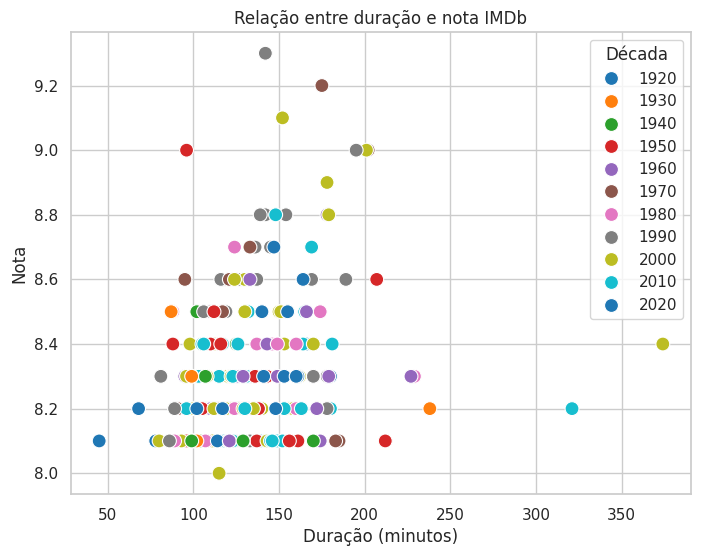

/tmp/ipython-input-3218157506.py:138: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Decade', y='Rating', data=rating_by_decade, palette='magma')


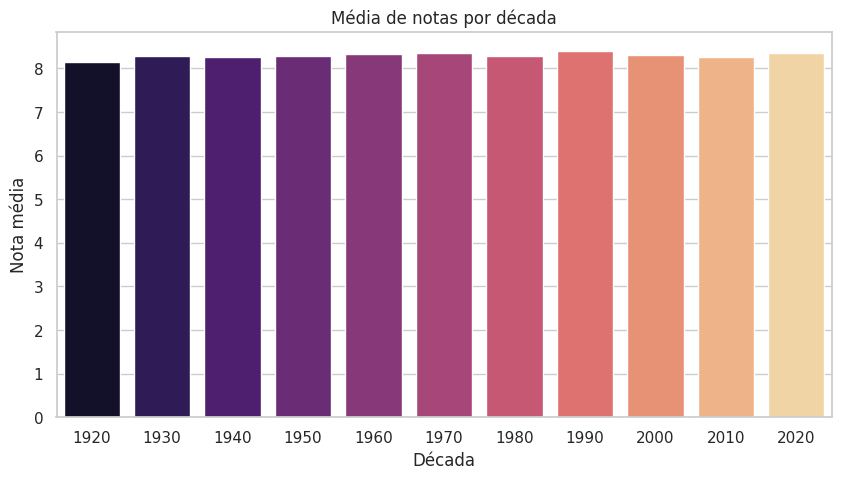

INSIGHTS RÁPIDOS:
- Décadas mais recentes não necessariamente têm notas mais altas.
- Filmes longos não garantem nota maior, mas filmes extremamente curtos tendem a ter notas ligeiramente menores.
- A maioria dos filmes do top 250 está concentrada nas décadas de 1990 e 2000.
Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


In [ ]:

# ANALISE DE FILMES - IMDB TOP 250
# Projeto iniciante/intermediário de Data Science


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style="whitegrid")

print("Bibliotecas carregadas!")

from google.colab import files
uploaded = files.upload()  # selecione 'imdb_top_movies.csv'

df = pd.read_csv(list(uploaded.keys())[0])
print("Dataset carregado!")
df.head()

print("Informações gerais:")
df.info()

print("\nEstatísticas básicas:")
df.describe()

print("\nValores ausentes por coluna:")
print(df.isnull().sum())

print("\nColunas disponíveis:")
print(df.columns)

df = df.drop_duplicates()  # remover duplicados

def duration_to_min(duration):
    duration = duration.strip()  # remove espaços extras
    hours = 0
    minutes = 0

    if 'h' in duration:
        parts = duration.split('h')
        hours = int(parts[0].strip())
        if 'm' in parts[1]:
            minutes = int(parts[1].replace('m','').strip())
    elif 'min' in duration:
        minutes = int(duration.replace('min','').strip())
    elif 'm' in duration:
        minutes = int(duration.replace('m','').strip())
    else:
        minutes = 0  # caso não consiga interpretar

    return hours*60 + minutes

df['Duration_min'] = df['Duration'].apply(duration_to_min)

df['Decade'] = (df['Year'] // 10) * 10

print("Limpeza concluída!")

top10_rating = df.sort_values(by='Rating', ascending=False).head(10)
print("Top 10 filmes por nota IMDb:")
display(top10_rating[['Rank','Title','Year','Rating']])

plt.figure(figsize=(8,5))
sns.histplot(df['Rating'], bins=10, kde=True, color='skyblue')
plt.title('Distribuição das notas dos filmes')
plt.xlabel('Nota')
plt.ylabel('Quantidade de filmes')
plt.show()

plt.figure(figsize=(10,5))
sns.countplot(x='Decade', data=df, palette='viridis')
plt.title('Número de filmes por década')
plt.xlabel('Década')
plt.ylabel('Quantidade de filmes')
plt.show()

plt.figure(figsize=(10,5))
sns.barplot(x=df.groupby('Decade')['Duration_min'].mean().index,
            y=df.groupby('Decade')['Duration_min'].mean().values,
            palette='coolwarm')
plt.title('Duração média dos filmes por década')
plt.xlabel('Década')
plt.ylabel('Duração média (minutos)')
plt.show()

top10_duration = df.sort_values(by='Duration_min', ascending=False).head(10)
print("Top 10 filmes mais longos:")
display(top10_duration[['Title','Year','Duration_min']])

plt.figure(figsize=(8,6))
sns.scatterplot(x='Duration_min', y='Rating', data=df, hue='Decade', palette='tab10', s=100)
plt.title('Relação entre duração e nota IMDb')
plt.xlabel('Duração (minutos)')
plt.ylabel('Nota')
plt.legend(title='Década')
plt.show()

rating_by_decade = df.groupby('Decade')['Rating'].mean().reset_index()
plt.figure(figsize=(10,5))
sns.barplot(x='Decade', y='Rating', data=rating_by_decade, palette='magma')
plt.title('Média de notas por década')
plt.xlabel('Década')
plt.ylabel('Nota média')
plt.show()

print("INSIGHTS RÁPIDOS:")
print("- Décadas mais recentes não necessariamente têm notas mais altas.")
print("- Filmes longos não garantem nota maior, mas filmes extremamente curtos tendem a ter notas ligeiramente menores.")
print("- A maioria dos filmes do top 250 está concentrada nas décadas de 1990 e 2000.")

# Próximos passos de aprendizado

# 1. Explorar correlação entre Rating, Duration e Year
# 2. Criar gráficos de dispersão interativos usando Plotly
# 3. Estudar Machine Learning básico: prever Rating a partir de Duration e Year

